In [1]:
import time
import warnings
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

warnings.filterwarnings(action='ignore')

url = 'https://play.google.com/store/apps/details?id=com.nexon.v4kr&showAllReviews=true'
driverPath = './opt/anaconda3/bin/chromedriver'

driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get(url)

scroll_time = 1.5
last_height = driver.execute_script('return document.body.scrollHeight')
for _ in range(5):
    for _ in range(4):
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
        time.sleep(scroll_time)
        
    driver.find_element_by_xpath("//span[@class='RveJvd snByac']").click()
    
    new_height = driver.execute_script('return document.body.scrollHeight')
    if new_height == last_height:
        break
    last_height = new_height

reviews = driver.find_elements_by_xpath("//span[@jsname='bN97Pc']")

[WDM] - ====== WebDriver manager ======


[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/89.0.4389.23/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/sangmanjung/.wdm/drivers/chromedriver/mac64/89.0.4389.23]


In [2]:
article_list = []
for i in range(len(reviews)):
    
    t1 = reviews[i].text.replace('게임','')
    t2 = t1.replace('전체','')
    t3 = t2.replace('유저','')
    t4 = t3.replace('리뷰','')
    t5 = t4.replace('생각','')
    
    article_list.append(t5)

In [3]:
from konlpy.tag import Kkma # 한글 토큰화 패키지

word_counts = {}

kkma =  Kkma()
for article_text in article_list:
    nouns = kkma.nouns(article_text) # 명사만 골라냄
    for noun in nouns:
        if len(noun) == 1:     # 한글자인 경우는 제외
            continue
        if noun not in word_counts: # 키 값 부여를 위해 기존 단어 중복 여부 체크
            word_counts[noun] = 0
        word_counts[noun] += 1 # 중복이 있으면 빈도수 체크
        
print('done')

done


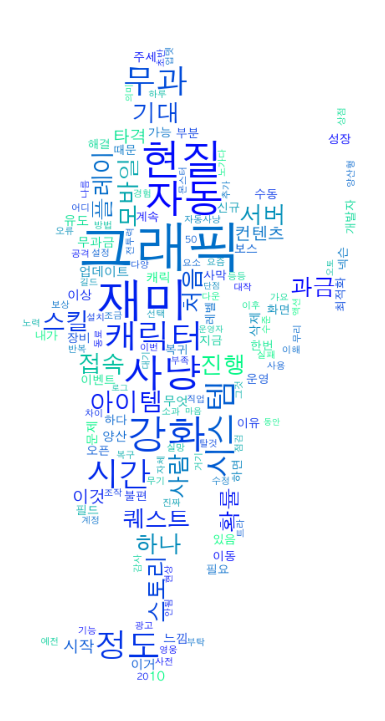

In [13]:
from wordcloud import WordCloud # 단어구름 생성 패키지
import matplotlib.pyplot as plt
from PIL import Image # 이미지 배열 호출을 위한 패키지
import numpy as np
import random

# 폰트와 마스크 커스텀
font = '/Macintosh HD/시스템/라이브러리/Fonts/Supplemental/AppleGothic.ttf' # 한글 폰트 지정
v4_mask = np.array(Image.open('v4newchar.png')) # word cloud frame으로 하기 위한 이미지

# 단어 구름 생성
wc = WordCloud(background_color = 'white',max_words = 150,width = 1000,height = 1000,
               font_path = font, mask = v4_mask,colormap = 'winter') # word cloud 설정

wc = wc.generate_from_frequencies(word_counts) # word cloud 생성

# figure 출력
plt.figure(figsize = (13,13))
plt.imshow(wc)
plt.axis('off')
# plt.show()
plt.savefig('v4wordcloud.png')